# Linear Regression – Multi-Feature Housing Price Prediction

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing Dataset

In [3]:
# Fetch dataset from sklearn
data = fetch_california_housing()
# Convert to DataFrame for easier analysis
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [4]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [5]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [6]:
# Check for missing values
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


# Exploratory Data Analysis (EDA)

In [7]:
# Summary statistics
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

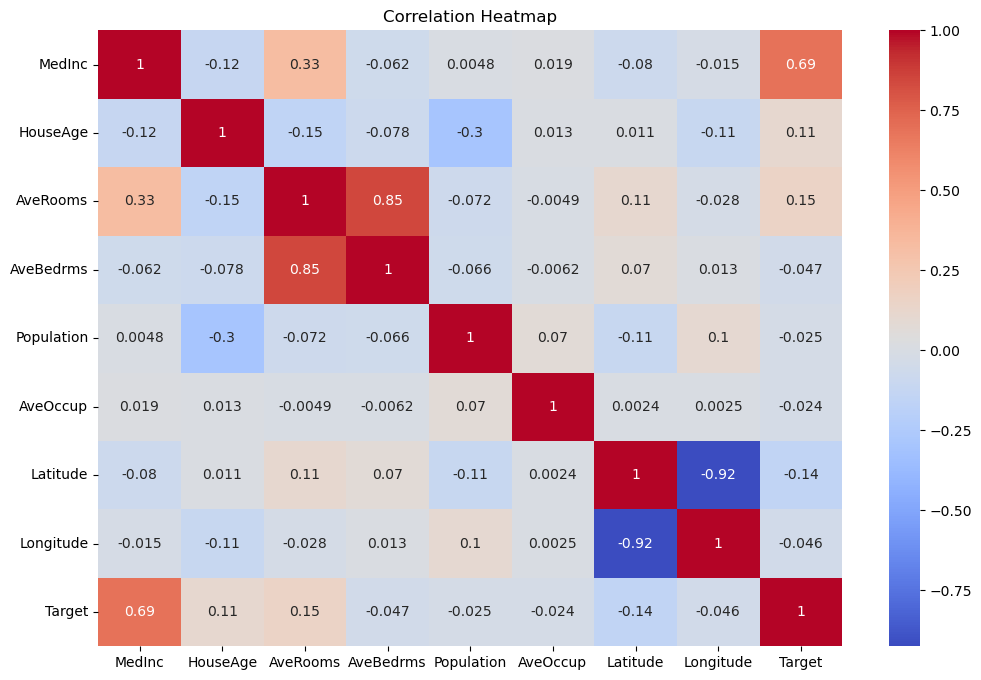

In [8]:
# Correlation heatmap to check relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

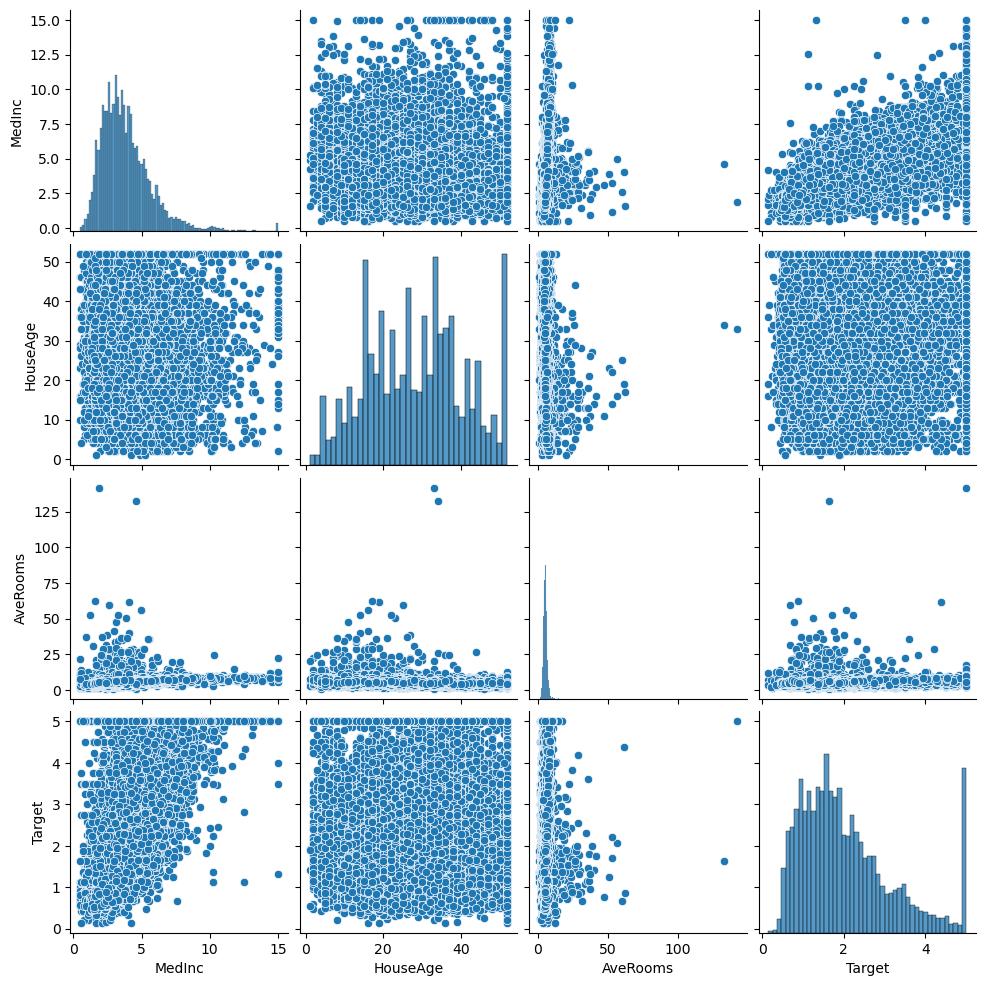

In [9]:
# Pair plot for selected features
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'Target']])
plt.show()

#  Data Preprocessing

In [10]:
# Define features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

In [11]:
# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building and Training

In [13]:
# Initialize Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
# Ridge Regression with GridSearchCV for hyperparameter tuning
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_model = GridSearchCV(ridge, ridge_params, cv=5)
ridge_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [15]:
# Lasso Regression with GridSearchCV for hyperparameter tuning
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_model = GridSearchCV(lasso, lasso_params, cv=5)
lasso_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

# Model Evaluation

In [16]:
# Linear Regression Evaluation
linear_pred = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

In [17]:
# Ridge Regression Evaluation
ridge_pred = ridge_model.best_estimator_.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [18]:
# Lasso Regression Evaluation
lasso_pred = lasso_model.best_estimator_.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [19]:
print("\nModel Evaluation Results:")
print(f"Linear Regression -> MSE: {linear_mse:.4f}, R²: {linear_r2:.4f}")
print(f"Ridge Regression -> Best Alpha: {ridge_model.best_params_['alpha']}, MSE: {ridge_mse:.4f}, R²: {ridge_r2:.4f}")
print(f"Lasso Regression -> Best Alpha: {lasso_model.best_params_['alpha']}, MSE: {lasso_mse:.4f}, R²: {lasso_r2:.4f}")


Model Evaluation Results:
Linear Regression -> MSE: 0.5559, R²: 0.5758
Ridge Regression -> Best Alpha: 0.1, MSE: 0.5559, R²: 0.5758
Lasso Regression -> Best Alpha: 0.1, MSE: 0.6796, R²: 0.4814


#  Visualization of Predictions

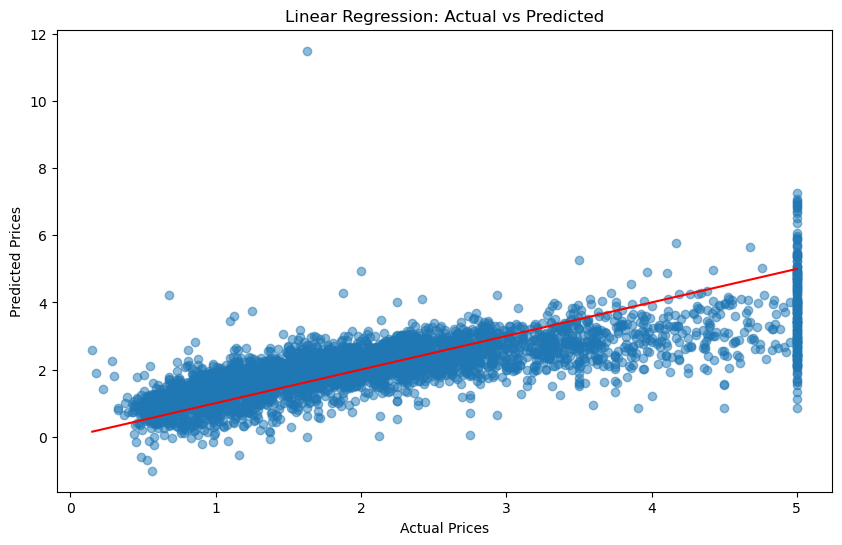

In [20]:
# Compare Actual vs Predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()